In [1]:
%load_ext Cython

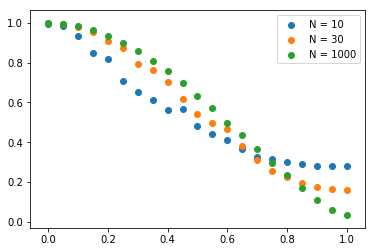

In [8]:
%%cython

import numpy as np
from matplotlib import pyplot as plt
import cython
from matplotlib.widgets import Button
from libc.stdlib cimport rand, RAND_MAX
from libc.math cimport sqrt,cos,sin

#Define Variables
cdef int MAX_SIZE=1000
cdef int MAX_TIME=10000
cdef double v=0.03
cdef double eta=0.1
cdef double L=3.1
cdef int N=40

#Initial State
cdef double[:] x = np.empty(MAX_SIZE,dtype=float)
cdef double[:] y = np.empty(MAX_SIZE,dtype=float)
cdef double[:] theta = np.empty(MAX_SIZE,dtype=float)
cdef double[:] theta_new = np.empty(MAX_SIZE,dtype=float)
cdef double order,order_new

#Initialize

cdef double uniform(double a,double b):
    cdef float num = rand()
    return(a+(num / RAND_MAX)*(b-a))

cdef initialize_array(double[:] array,double a,double b):
    cdef int i=0
    for i in range(N):
        array[i] = uniform(a,b)
        
cdef initialize():
    initialize_array(x,0,L)
    initialize_array(y,0,L)
    initialize_array(theta,-np.pi,np.pi)
    initialize_array(theta_new,-np.pi,np.pi)
    order=0
    order_new=1
    order_inst=[]
    
#Functions

cdef dist(int i,int j):
    return sqrt((x[i]-x[j])**2+(y[i]-y[j])**2)

cdef update():
    cdef int i,j,k
    cdef double theta_near
    for i in range(N):
        theta_near = 0
        k=0
        for j in range(N):
            if dist(i,j)<1:
                theta_near+=theta[j]
                k+=1
                
        theta_new[i] = theta_near/k + eta*uniform(-np.pi,np.pi)
    for i in range(N):
        theta[i]=theta_new[i]
        x[i]=(x[i]+v*cos(theta[i]))%L
        y[i]=(y[i]+v*sin(theta[i]))%L
        
#Plot


cdef double[:] order_arr = np.empty(21,dtype=float)
cdef double[:] eta_arr = np.empty(21,dtype=float)
cdef int i,j,k
cdef float i_f,theta_cos,theta_sin
for i in range(21):
    i_f=i
    eta_arr[i] = i_f/20

cdef double[:] ordall = np.zeros(MAX_TIME,dtype=float)
cdef err = 0
#"""
N_arr = [10,30,1000]
for N in N_arr:
    i=0
    err = 0.000000001*(N**3)
    for eta in eta_arr:
        initialize()
        for k in range(MAX_TIME):
            if k>100:
                if abs(ordall[k-1]-ordall[k-2])<err:
                    break
            theta_cos=0
            theta_sin=0
            update()
            for j in range(N):
                theta_cos+=cos(theta[j])
                theta_sin+=sin(theta[j])
            order_new=sqrt(theta_cos**2+theta_sin**2)/N
            ordall[k]=order_new
        order_arr[i]=np.mean(ordall[3*k/4:k])
        i+=1
        
    plt.scatter(eta_arr,order_arr,label='N = '+str(N))
#"""
plt.legend(loc='upper right')
#
"""
i=0
for eta in eta_arr:
    initialize()
    for k in range(Max):
        if k%10==0 & k!=0:
            if abs(ordall[k-1]-ordall[k-2])<0.1:
                break
        theta_cos=0
        theta_sin=0
        update()
        for j in range(N):
            theta_cos+=cos(theta[j])
            theta_sin+=sin(theta[j])
        order_new=sqrt(theta_cos**2+theta_sin**2)/N
        ordall[k]=order_new
    order_arr[i]=np.mean(ordall[k*3/4:k])
    i+=1
        
plt.scatter(eta_arr,order_arr)
"""
plt.show()